In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import os
import re
import matplotlib.pyplot as plt

# 分析不同信噪比数据量直方图

## 读文件

In [2]:
df_lamost = pd.read_csv(r'G:\Star\1_Data_download_and_preprocessing\raw_data_catalogue_label\DR11_V11_SNRG=5_class=star_noComment.csv')

In [3]:
df_lamost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9625555 entries, 0 to 9625554
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   obsid   int64  
 1   uid     object 
 2   snrg    float64
 3   class   object 
 4   z       float64
 5   ra      float64
 6   dec     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 514.1+ MB


# 参数直方图

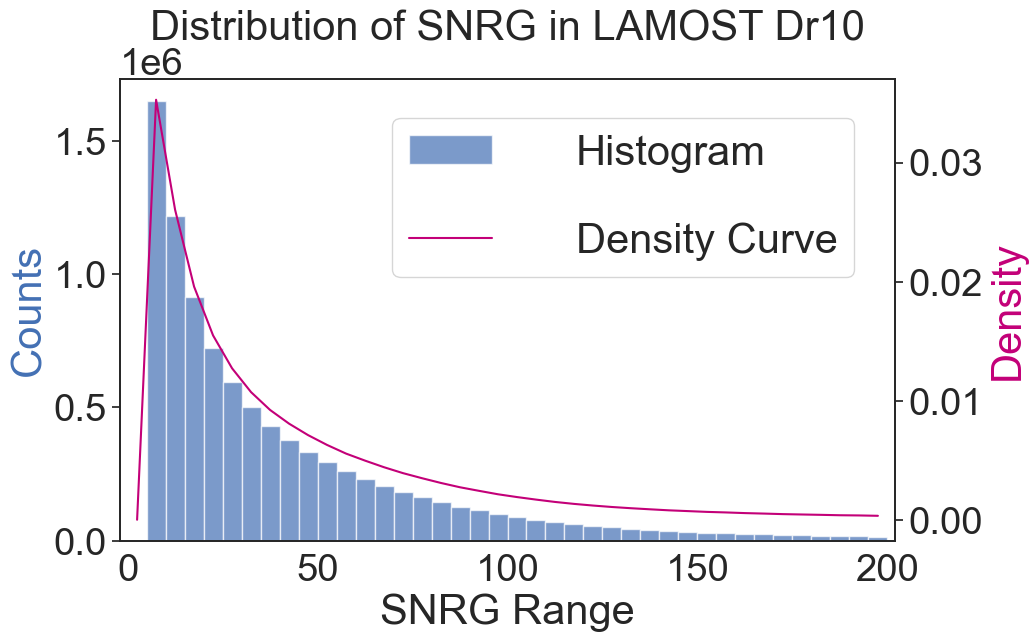

In [4]:



# 设置Seaborn的风格
sns.set(style="white",font_scale=2.5)    # dark

# 创建图形和坐标轴，设置图像大小为10x6英寸
fig, ax1 = plt.subplots(figsize=(10, 6))

# 提取SNRG值，这里假设df_lamost是DataFrame且包含lamost_snrg列
snrg_values = df_lamost['snrg']

# 绘制直方图
n, bins, patches = ax1.hist(snrg_values, bins=40, range=(0, 200), alpha=0.7, color='#4370B4', label='Histogram')

# 创建第二个坐标轴
ax2 = ax1.twinx()

# 绘制密度曲线
density, _ = np.histogram(snrg_values, bins=40, range=(0, 200), density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
ax2.plot(bin_centers, density, label='Density Curve', color='#C30078')

# 设置坐标轴标签和图例
ax1.set_xlabel('SNRG Range',)
ax1.set_ylabel('Counts', color='#4370B4')
ax2.set_ylabel('Density', color='#C30078')

# 设置标题和调整标题的垂直空间（pad）
ax1.set_title('Distribution of SNRG in LAMOST Dr10', pad=0)
# fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))

ax1.margins(x=0.01) 

fig.legend(loc='upper right', bbox_to_anchor=(0.88, 0.85), fontsize='medium', handlelength=2, handletextpad=2, labelspacing=1.2)   #large


# 显示图形
plt.show()

fig.savefig('distribution_of_snrg.png', dpi=300, bbox_inches='tight')

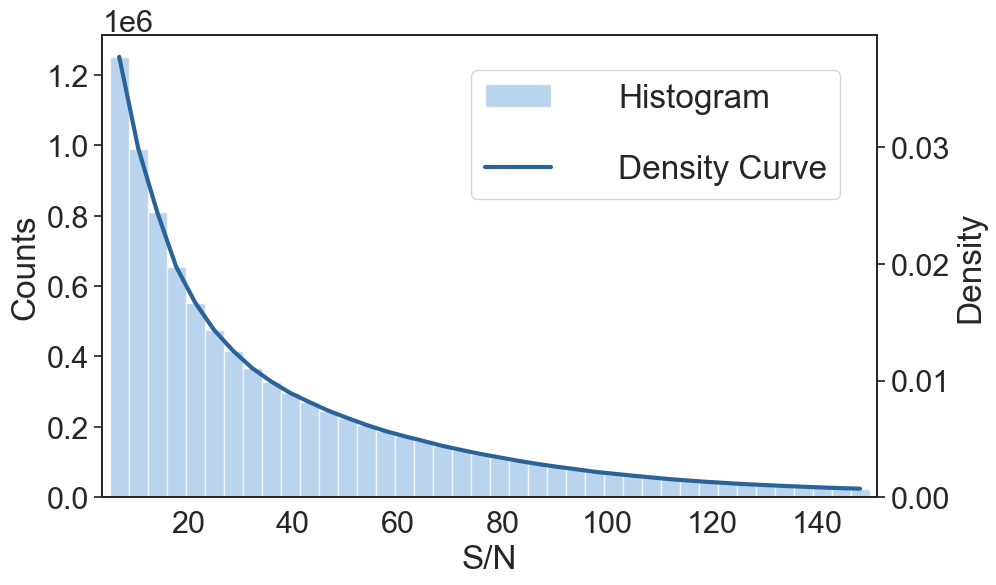

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 设置Seaborn的风格
sns.set(style="white", font_scale=2)
plt.rcParams.update({
    "text.usetex": False
})

# 创建图形和坐标轴，设置图像大小为10x6英寸
fig, ax1 = plt.subplots(figsize=(10, 6))

# 提取SNRG值，这里假设df_lamost是DataFrame且包含lamost_snrg列
snrg_values = df_lamost['snrg']

color_rgb = (157/255, 195/255, 231/255)
# 绘制直方图，修改范围为5-150
n, bins, patches = ax1.hist(snrg_values, bins=40, range=(5, 150), alpha=0.7, color=color_rgb, label='Histogram')

# 创建第二个坐标轴
ax2 = ax1.twinx()

# 计算密度并绘制密度曲线，修改范围为5-150
density, _ = np.histogram(snrg_values, bins=40, range=(5, 150), density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
ax2.plot(bin_centers, density, label='Density Curve', color='#2A6398', linewidth=3)

# 设置 y 轴范围确保从 0 开始
ax2.set_ylim(bottom=0)

# 设置坐标轴标签和图例
ax1.set_xlabel('S/N')
ax1.set_ylabel('Counts')
ax2.set_ylabel('Density')

# 调整边距
ax1.margins(x=0.01)

# 添加图例
fig.legend(loc='upper right', bbox_to_anchor=(0.88, 0.85), fontsize='medium', handlelength=2, handletextpad=2, labelspacing=1.2)

# 显示图形
plt.show()

# 保存图形
fig.savefig('distribution_of_snrg.png', dpi=300, bbox_inches='tight')
fig.savefig('distribution_of_snrg.pdf', bbox_inches='tight', format='pdf')


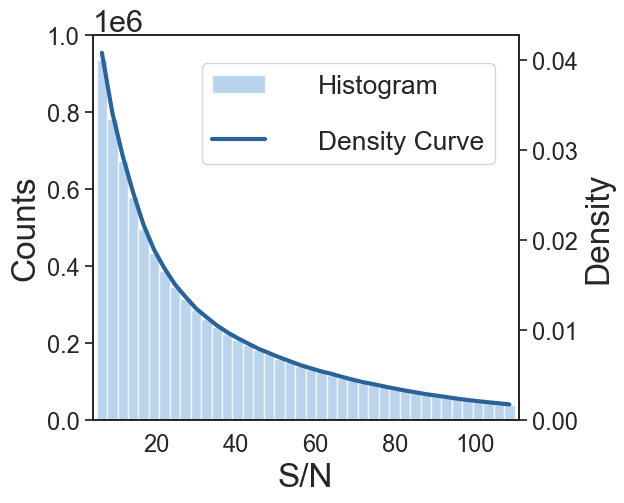

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 设置Seaborn的风格
sns.set(style="white", font_scale=2)

plt.rcParams.update({'font.size': 19})  # 全局字体设置

plt.rcParams.update({
    "text.usetex": False
})

# 创建图形和坐标轴，设置图像大小为10x6英寸
fig, ax1 = plt.subplots(figsize=(5.5, 5))

# 提取SNRG值，这里假设df_lamost是DataFrame且包含lamost_snrg列
snrg_values = df_lamost['snrg']

color_rgb = (157/255, 195/255, 231/255)
# 绘制直方图，修改范围为5-110
n, bins, patches = ax1.hist(snrg_values, bins=40, range=(5, 110), alpha=0.7, color=color_rgb, label='Histogram')

# 创建第二个坐标轴
ax2 = ax1.twinx()

# 绘制密度曲线，修改范围为5-110
density, _ = np.histogram(snrg_values, bins=40, range=(5, 110), density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
ax2.plot(bin_centers, density, label='Density Curve', color='#2A6398', linewidth=3)

# 设置 y 轴范围确保从 0 开始
ax2.set_ylim(bottom=0)

# 设置坐标轴标签和图例
ax1.set_ylim(0, 1e6)
ax1.set_xlabel(r'$S/N_{g}$ Range')
ax1.set_xlabel('S/N')
ax1.set_ylabel('Counts')
ax2.set_ylabel('Density')

# 调整刻度标签字体大小为15
ax1.tick_params(axis='both', labelsize=17)  # 调整 ax1 的x和y轴刻度标签字体大小
ax2.tick_params(axis='y', labelsize=17)     # 调整 ax2 的y轴刻度标签字体大小


# 调整边距
ax1.margins(x=0.01)

# 添加图例
fig.legend(loc='upper right', bbox_to_anchor=(0.88, 0.85), fontsize='medium', handlelength=2, handletextpad=2, labelspacing=1.2)

# 显示图形
plt.show()

# 保存图形
fig.savefig('distribution_of_snrg.png', dpi=300, bbox_inches='tight')
fig.savefig('distribution_of_snrg.pdf', bbox_inches='tight', format='pdf')



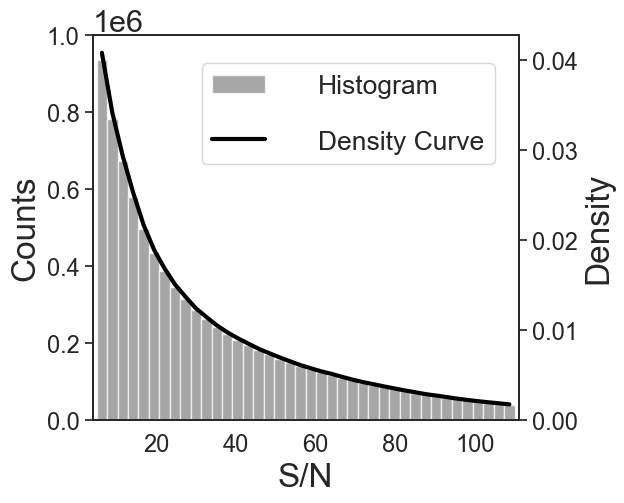

In [9]:
# 黑白

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 设置Seaborn的风格
sns.set(style="white", font_scale=2)

plt.rcParams.update({'font.size': 19})  # 全局字体设置

plt.rcParams.update({
    "text.usetex": False
})

# 创建图形和坐标轴，设置图像大小为10x6英寸
fig, ax1 = plt.subplots(figsize=(5.5, 5))

# 提取SNRG值，这里假设df_lamost是DataFrame且包含lamost_snrg列
snrg_values = df_lamost['snrg']

color_rgb = (157/255, 195/255, 231/255)
hist_color = 'grey'  #灰色直方图
# 绘制直方图，修改范围为5-110
n, bins, patches = ax1.hist(snrg_values, bins=40, range=(5, 110), alpha=0.7, color=hist_color, label='Histogram')

# 创建第二个坐标轴
ax2 = ax1.twinx()

# 绘制密度曲线，修改范围为5-110
density, _ = np.histogram(snrg_values, bins=40, range=(5, 110), density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
ax2.plot(bin_centers, density, label='Density Curve', color='black', linewidth=3)

# 设置 y 轴范围确保从 0 开始
ax2.set_ylim(bottom=0)

# 设置坐标轴标签和图例
ax1.set_ylim(0, 1e6)
ax1.set_xlabel(r'$S/N_{g}$ Range')
ax1.set_xlabel('S/N')
ax1.set_ylabel('Counts')
ax2.set_ylabel('Density')

# 调整刻度标签字体大小为15
ax1.tick_params(axis='both', labelsize=17)  # 调整 ax1 的x和y轴刻度标签字体大小
ax2.tick_params(axis='y', labelsize=17)     # 调整 ax2 的y轴刻度标签字体大小


# 调整边距
ax1.margins(x=0.01)

# 添加图例
fig.legend(loc='upper right', bbox_to_anchor=(0.88, 0.85), fontsize='medium', handlelength=2, handletextpad=2, labelspacing=1.2)

# 显示图形
plt.show()

# 保存图形
fig.savefig('distribution_of_snrg_black.png', dpi=300, bbox_inches='tight')
fig.savefig('distribution_of_snrg_black.pdf', bbox_inches='tight', format='pdf')

